<a href="https://colab.research.google.com/github/Lawkage1/AI-Driven-Network-Failure-Prediction/blob/main/AIdrivenProj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#*Data Cleaning and PreProcessing*

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# from google.colab import files
# file = files.upload()

In [ ]:
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d suraj520/cellular-network-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/suraj520/cellular-network-analysis-dataset
License(s): CC0-1.0
cellular-network-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip cellular-network-analysis-dataset.zip

Archive:  cellular-network-analysis-dataset.zip
replace signal_metrics.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: signal_metrics.csv      


In [ ]:
df = pd.read_csv('signal_metrics.csv')
df.head()

,Timestamp,Locality,Latitude,Longitude,Signal Strength (dBm),Signal Quality (%),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,2023-05-05 12:50:40.000000,Anisabad,25.599109,85.137355,-84.274113,0.0,1.863890,129.122914,3G,0.000000,0.000000,0.000000
1,2023-05-05 12:53:47.210173,Fraser Road,25.433286,85.070053,-97.653121,0.0,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
2,2023-05-05 12:56:54.420346,Boring Canal Road,25.498809,85.211371,-87.046134,0.0,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
3,2023-05-05 13:00:01.630519,Danapur,25.735138,85.208400,-94.143159,0.0,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
4,2023-05-05 13:03:08.840692,Phulwari Sharif,25.538556,85.159860,-94.564765,0.0,38.292038,30.342828,5G,-90.489100,-103.318304,-95.102467


In [ ]:
!git clone https://github.com/kautik4/5G-dataset/blob/main/data%20final.csv

Cloning into 'data%20final.csv'...
fatal: repository 'https://github.com/kautik4/5G-dataset/blob/main/data%20final.csv/' not found


In [ ]:
!wget https://raw.githubusercontent.com/adrish20/final_data/main/data%20final.csv

--2024-09-27 06:11:41--  https://raw.githubusercontent.com/adrish20/final_data/main/data%20final.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1227496 (1.2M) [text/plain]
Saving to: ‘data final.csv.2’

data final.csv.2    100%[===================>]   1.17M  --.-KB/s    in 0.09s   

2024-09-27 06:11:41 (13.7 MB/s) - ‘data final.csv.2’ saved [1227496/1227496]



In [ ]:
import pandas as pd
data_cleaned = pd.read_csv('data final.csv', on_bad_lines='skip')
data_cleaned.head()


,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,1,Fraser Road,-97.653121,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
2,3,Danapur,-94.143159,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467
4,5,Bankipore,-91.196029,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907


In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/adrish20/final_data/refs/heads/main/data%20final.csv'
data_cleaned = pd.read_csv(url, on_bad_lines='skip')
data_cleaned.head(10)

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm)
0,1,Fraser Road,-97.653121,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070
2,3,Danapur,-94.143159,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467
4,5,Bankipore,-91.196029,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907
5,6,Kidwaipuri,-85.653092,4.036609,99.887024,4G,-87.985282,-90.770017,-86.186870
6,7,Phulwari Sharif,-85.980052,2.670605,132.078006,LTE,-89.114867,-95.776177,-85.434695
7,8,Gardanibagh,-96.842118,2.992507,196.541935,LTE,-96.259184,-102.428937,-98.709876
8,9,S.K. Puri,-90.308407,9.244326,81.556931,4G,-87.360294,-97.795221,-89.846984
9,10,Pataliputra,-88.635392,1.588898,138.509773,LTE,-85.124025,-97.050782,-90.618436


In [ ]:
data_cleaned['Failure'] = (
    (data_cleaned['Signal Strength (dBm)'] < -93) |
    (
        (data_cleaned['BB60C Measurement (dBm)'] < -93) &
        (data_cleaned['srsRAN Measurement (dBm)'] < -93) &
        (data_cleaned['BladeRFxA9 Measurement (dBm)'] < -93) &
        (data_cleaned['Latency (ms)'] > 90)
    )
).astype(int)
data_cleaned.head(200)

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),Network Type,BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure
0,1,Fraser Road,-97.653121,5.132296,54.883606,4G,-95.810791,-105.452359,-99.920892,1
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,LTE,-91.593861,-95.419482,-87.714070,0
2,3,Danapur,-94.143159,68.596932,46.598387,5G,-90.642773,-101.895905,-96.570698,1
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,5G,-90.489100,-103.318303,-95.102467,1
4,5,Bankipore,-91.196029,1.712596,190.682844,LTE,-93.474707,-97.957579,-94.192907,1
...,...,...,...,...,...,...,...,...,...,...
195,196,Boring Canal Road,-88.036339,7.327995,89.073104,4G,-86.003566,-93.864047,-90.699055,0
196,197,Phulwari Sharif,-91.675355,32.804146,45.803062,5G,-90.936064,-99.921467,-89.679192,0
197,198,Anandpuri,-98.824859,28.505934,34.547328,5G,-101.593995,-106.096515,-97.721008,1
198,199,Kidwaipuri,-91.950821,2.311642,153.727567,LTE,-90.179579,-98.537466,-91.178417,0


#*Test Encoder*

In [ ]:
# Fill NaN values with 'Unknown'
data_cleaned['Network Type'] = data_cleaned['Network Type'].fillna('Unknown')

# Reapply One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
nt_encoded = encoder.fit_transform(data_cleaned[['Network Type']])

# Create a DataFrame for the encoded values
nt_encoded_df = pd.DataFrame(nt_encoded, columns=encoder.get_feature_names_out(['Network Type']))

# Concatenate the encoded columns to the original DataFrame and drop the old 'Network Type' column
data_cleaned = pd.concat([data_cleaned, nt_encoded_df], axis=1)
data_cleaned = data_cleaned.drop('Network Type', axis=1)

# Check the result
data_cleaned.head()


,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure,Network Type_4G,Network Type_5G,Network Type_LTE,Network Type_Unknown
0,1,Fraser Road,-97.653121,5.132296,54.883606,-95.810791,-105.452359,-99.920892,1,1.0,0.0,0.0,0.0
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,-91.593861,-95.419482,-87.714070,0,0.0,0.0,1.0,0.0
2,3,Danapur,-94.143159,68.596932,46.598387,-90.642773,-101.895905,-96.570698,1,0.0,1.0,0.0,0.0
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,-90.489100,-103.318303,-95.102467,1,0.0,1.0,0.0,0.0
4,5,Bankipore,-91.196029,1.712596,190.682844,-93.474707,-97.957579,-94.192907,1,0.0,0.0,1.0,0.0


In [ ]:
# Drop rows where 'Network Type_Unknown' is 1
data_cleaned = data_cleaned[data_cleaned['Network Type_Unknown'] == 0]

# Drop the 'Network Type_Unknown' column itself if not needed anymore
data_cleaned = data_cleaned.drop('Network Type_Unknown', axis=1)

# Check the result
data_cleaned.head()

,Sr.No.,Locality,Signal Strength (dBm),Data Throughput (Mbps),Latency (ms),BB60C Measurement (dBm),srsRAN Measurement (dBm),BladeRFxA9 Measurement (dBm),Failure,Network Type_4G,Network Type_5G,Network Type_LTE
0,1,Fraser Road,-97.653121,5.132296,54.883606,-95.810791,-105.452359,-99.920892,1,1.0,0.0,0.0
1,2,Boring Canal Road,-87.046134,1.176985,119.598286,-91.593861,-95.419482,-87.714070,0,0.0,0.0,1.0
2,3,Danapur,-94.143159,68.596932,46.598387,-90.642773,-101.895905,-96.570698,1,0.0,1.0,0.0
3,4,Phulwari Sharif,-94.564765,38.292038,30.342828,-90.489100,-103.318303,-95.102467,1,0.0,1.0,0.0
4,5,Bankipore,-91.196029,1.712596,190.682844,-93.474707,-97.957579,-94.192907,1,0.0,0.0,1.0


Index(['Sr.No.', 'Locality', 'Signal Strength (dBm)', 'Data Throughput (Mbps)',
       'Latency (ms)', 'BB60C Measurement (dBm)', 'srsRAN Measurement (dBm)',
       'BladeRFxA9 Measurement (dBm)', 'Failure', 'Network Type_4G',
       'Network Type_5G', 'Network Type_LTE'],
      dtype='object')


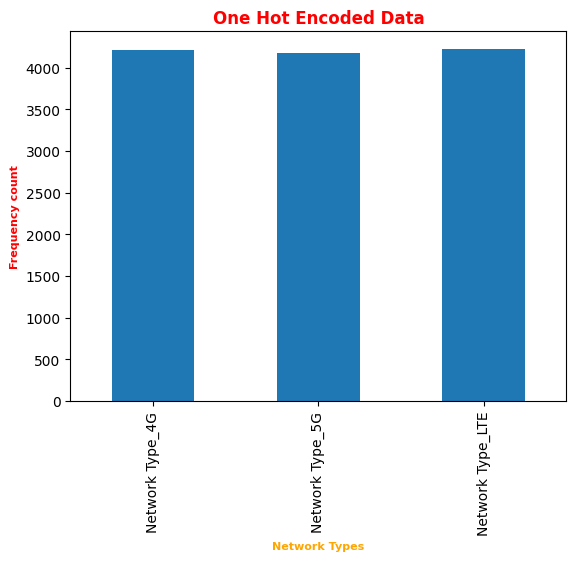

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have already cleaned and one-hot encoded your data as 'data_cleaned'

# Check if 'Network Type_4G' exists or create it based on the conditions
data_cleaned['Network Type_4G'] = 0  # Initialize 'Network Type_4G' with 0
data_cleaned.loc[(data_cleaned['Network Type_5G'] == 0) & (data_cleaned['Network Type_LTE'] == 0), 'Network Type_4G'] = 1

# Ensure that there are no NaN values in the relevant columns
data_cleaned['Network Type_4G'].fillna(0, inplace=True)

# Step 1: Ensure the one-hot encoded columns exist
print(data_cleaned.columns)  # Check if the one-hot encoded columns are present

# Step 2: Filter the one-hot encoded columns using regex (correcting column names)
one_hot_encoded_data = data_cleaned.filter(regex='^Network Type_')

# Step 3: Remove any 'NaN' or 'nan' column if it exists
if 'Network Type_nan' in one_hot_encoded_data.columns:
    one_hot_encoded_data = one_hot_encoded_data.drop(columns=['Network Type_nan'])

# Step 4: Check if the filtered data is empty (to handle potential issues)
if one_hot_encoded_data.empty:
    print("No columns found for the one-hot encoded data. Check the column names or regex.")
else:
    # Step 5: Sum the one-hot encoded columns and plot the result
    one_hot_encoded_data.sum().plot(kind='bar')
    plt.title('One Hot Encoded Data', color='red', fontsize=12, fontweight='bold')
    plt.xlabel('Network Types', color='orange', size=8, weight='bold')
    plt.ylabel('Frequency count', color='red', size=8, weight='bold')
    plt.show()


#*Training and Testing*

In [ ]:
X = data_cleaned.drop(columns=['Failure', 'Sr.No.', 'Locality'])
y = data_cleaned['Failure']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled,y_train)
y_pred = model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1537
           1       1.00      1.00      1.00       988

    accuracy                           1.00      2525
   macro avg       1.00      1.00      1.00      2525
weighted avg       1.00      1.00      1.00      2525

[[1537    0]
 [   2  986]]


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20, 30],
}
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=3)
grid_search.fit(X_train_scaled, y_train)
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'max_depth': None, 'n_estimators': 100}


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9992079207920792


#*Saving The Path*

In [ ]:
import joblib
joblib.dump(model, 'network_failure_model.pkl')
loaded_model = joblib.load('network_failure_model.pkl')

In [ ]:
import os

# Get absolute path of the saved model
model_path = os.path.abspath('random_forest_model.pkl')
print("Model saved at:", model_path)

Model saved at: /content/random_forest_model.pkl
